In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import cv2
import pickle

In [9]:
# List to store coordinates

camera_pixel_coords_list = []


# Change list name when calibrating


In [10]:

# Callback function to handle mouse click
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Clicked at pixel coordinates: x = {x}, y = {y}")
        camera_pixel_coords_list.append([x, y])

# Initialize webcam
cap = cv2.VideoCapture(1)  # Change to the correct camera index if needed

# Set mouse callback
cv2.namedWindow("Webcam Feed")
cv2.setMouseCallback("Webcam Feed", mouse_click)

print("Click on the object in the video window to get pixel coordinates. Press ESC to exit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame from webcam.")
        break

    cv2.imshow("Webcam Feed", frame)

    key = cv2.waitKey(1)
    if key == 27:  # ESC to exit
        break

cap.release()
cv2.destroyAllWindows()

# Convert to NumPy array
camera_pixel_coords = np.array(camera_pixel_coords_list)
print("Collected Pixel Coordinates:")
print(camera_pixel_coords)


Click on the object in the video window to get pixel coordinates. Press ESC to exit.
Clicked at pixel coordinates: x = 799, y = 170
Clicked at pixel coordinates: x = 1041, y = 199
Clicked at pixel coordinates: x = 906, y = 269
Clicked at pixel coordinates: x = 1174, y = 263
Clicked at pixel coordinates: x = 857, y = 367
Clicked at pixel coordinates: x = 1044, y = 400
Clicked at pixel coordinates: x = 1014, y = 425
Clicked at pixel coordinates: x = 911, y = 529
Clicked at pixel coordinates: x = 1181, y = 528
Clicked at pixel coordinates: x = 878, y = 604
Clicked at pixel coordinates: x = 1046, y = 599
Clicked at pixel coordinates: x = 1124, y = 102
Clicked at pixel coordinates: x = 939, y = 95
Clicked at pixel coordinates: x = 1158, y = 233
Clicked at pixel coordinates: x = 991, y = 305
Clicked at pixel coordinates: x = 1100, y = 370
Clicked at pixel coordinates: x = 1212, y = 510
Clicked at pixel coordinates: x = 1092, y = 563
Clicked at pixel coordinates: x = 978, y = 523
Clicked at p

In [11]:
print(camera_pixel_coords_list)

[[799, 170], [1041, 199], [906, 269], [1174, 263], [857, 367], [1044, 400], [1014, 425], [911, 529], [1181, 528], [878, 604], [1046, 599], [1124, 102], [939, 95], [1158, 233], [991, 305], [1100, 370], [1212, 510], [1092, 563], [978, 523], [788, 464], [767, 286]]


In [12]:
robot_coordinates = np.array([[393.6,-47.6], [245.8,-29.9], [325.3,11.4], [164.9,7.9], [356.9,73.4], [244.5,92.9], [262.6,107.8], [323.9,170.4], [164.6,168.5], [343.1,215.1], [243.9,212.2],[198.2,-89.7],[313,-95.1],[181,-7.5],[278.4,35.7],[213.2,74.8],[152,159.8],[222.3,192.8],[291.9,166.9],[397.1,132.2],[413.1,28.3]])

# Least square regression

In [13]:
camera_pixel_coords = np.array(camera_pixel_coords_list)
robot_coordinates = np.array(robot_coordinates)

camera_x = camera_pixel_coords[:, 0]
camera_y = camera_pixel_coords[:, 1]
robot_x = robot_coordinates[:, 0]
robot_y = robot_coordinates[:, 1]

A_x = np.vstack([camera_x, np.ones(len(camera_x))]).T
theta_x = np.linalg.pinv(A_x) @ robot_x
m1, c1 = theta_x    

A_y = np.vstack([camera_y, np.ones(len(camera_y))]).T
theta_y = np.linalg.pinv(A_y) @ robot_y
m2, c2 = theta_y

print(f"robot_x = {m1:.4f} * camera_x + {c1:.4f}")
print(f"robot_y = {m2:.4f} * camera_y + {c2:.4f}")

robot_x = -0.5925 * camera_x + 865.3659
robot_y = 0.6077 * camera_y + -150.5850


## Calculating predicted Coordinates for the arm

In [14]:
def mapped_coordinates(x, y, m1, c1, m2, c2):
    robot_x = m1 * x + c1
    robot_y = m2 * y + c2
    return robot_x, robot_y

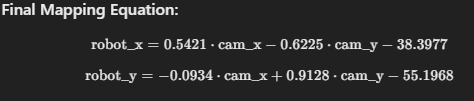

## Normalisation

In [17]:
h=1920
b=1080

In [15]:
norm_x = ((532)/1000)*h
norm_y = ((171)/1000)*b

In [18]:
robot_x, robot_y = mapped_coordinates(norm_x,norm_y,m1,c1, m2, c2)
print(robot_x, robot_y)

260.1197065090886 -38.352730139522166


## Plot  (actual vs predicted)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('regression.csv')  # Change this to your actual file name

# Extract all m and c values into a list
m_values = []
c_values = []

for col in df.columns:
    if col.startswith('m'):
        m_values.extend(df[col].tolist())
    elif col.startswith('c'):
        c_values.extend(df[col].tolist())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(m_values, label='m values', marker='o')
plt.plot(c_values, label='c values', marker='x')
plt.title('Regression Coefficients: m and c values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()